In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Delhi.csv
/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Kolkata.csv
/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Hyderabad.csv
/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Bangalore.csv
/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Mumbai.csv
/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Chennai.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import folium
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
from string import ascii_letters
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA

In [3]:
%%html
<div>
    <img src="https://i.imgur.com/Q5IhUpF.gif">
</div>

In [4]:
df1 = pd.read_csv(r"/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Mumbai.csv")
df2 = pd.read_csv(r"/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Bangalore.csv")
df3 = pd.read_csv(r"/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Delhi.csv")
df4 = pd.read_csv(r"/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Hyderabad.csv")

In [5]:
custom_colors = ["#4e89ae","#c56183","#ed6663","#ffa372"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

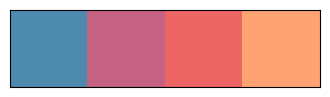

In [6]:
sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis= "both", labelsize=0, length= 0)

# <span style = "color: red"> MUMBAI </span>


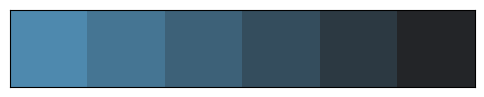

In [7]:
mumbai = sns.dark_palette(custom_colors[0], reverse = True)
sns.palplot(sns.color_palette(mumbai),size =1)
plt.tick_params(axis = 'both', labelsize=0, length=0)

#  <span style = "color: red"> BANGALORE </span>

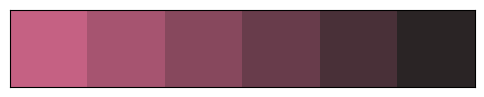

In [8]:
bangalore = sns.dark_palette(custom_colors[1], reverse = True)
sns.palplot(sns.color_palette(bangalore),size =1)
plt.tick_params(axis = 'both', labelsize=0, length=0)

# <span style = 'color: red'> DELHI </span>

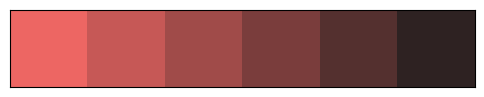

In [9]:
delhi = sns.dark_palette(custom_colors[2], reverse = True)
sns.palplot(sns.color_palette(delhi),size =1)
plt.tick_params(axis='both',labelsize=0,length=0)

# <span style = 'color: red'> HYDERABAD </span>

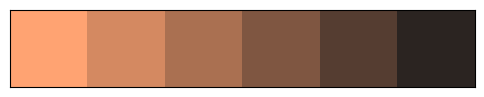

In [10]:
hyderabad = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(hyderabad), size=1)
plt.tick_params(axis='both', labelsize=0, length=0)

In [11]:
df1.head(7)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
5,17000000,2000,Kharghar,4,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
6,12500000,1550,Kharghar,3,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [12]:
df1.shape

(7719, 40)

In [13]:
df2.shape

(6207, 40)

In [14]:
df3.shape

(4998, 40)

In [15]:
df4.shape

(2518, 40)

In [16]:
# Checking for null values
df1.isna().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [17]:
df2.isna().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [18]:
df3.isna().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [19]:
df4.isna().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [20]:
# Since there are some null values so we will replace them with 9 and will be dropping these values 
# so that it doesn't cloud our analysis

In [21]:
df1.replace(9, np.nan, inplace=True)
df2.replace(9,np.nan, inplace=True)
df3.replace(9,np.nan, inplace=True)
df4.replace(9, np.nan, inplace=True)

In [22]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()

In [23]:
# Dataframe after dropping these values

In [24]:
print(f"{y_}Mumbai:{r_}{df1.shape}\n")
print(f"{y_}Delhi:{r_}{df2.shape}\n")
print(f"{y_}Chennai:{r_}{df3.shape}\n")
print(f"{y_}Hyderabad:{r_}{df4.shape}\n")

Mumbai:(1398, 40)

Delhi:(1951, 40)

Chennai:(2002, 40)

Hyderabad:(2434, 40)



In [25]:
print(f"{y_}Data types of data columns: \n{m_}{df1.dtypes}")

Data types of data columns: 
Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED       

In [26]:
#Modifying the Price in lakhs(INR)
df1['Price'] = df1['Price'] / 100000
df2['Price'] = df2['Price'] / 100000
df3['Price'] = df3['Price'] / 100000
df4['Price'] = df4['Price'] / 100000

In [27]:
df1.head(7)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,48.5,720,Kharghar,1,1,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,45.0,600,Kharghar,1,1,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67.0,650,Kharghar,1,1,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45.0,650,Kharghar,1,1,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,50.0,665,Kharghar,1,1,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,170.0,2000,Kharghar,4,1,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,125.0,1550,Kharghar,3,1,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5981029030>,
 'caps': [<matplotlib.lines.Line2D at 0x7f59810298d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5981028070>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5981029e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f598102a0b0>],
 'means': []}

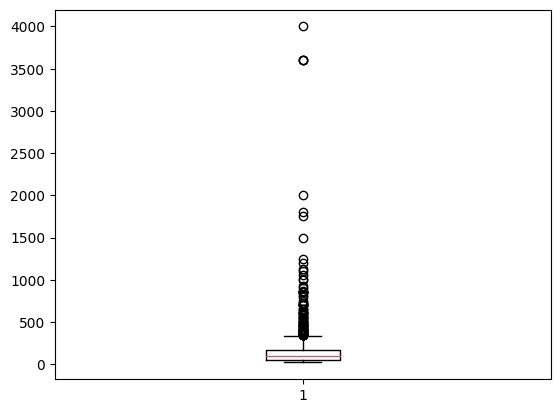

In [28]:
plt.boxplot(df1["Price"])

In [29]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='Ana')

def feature_generation(df):
    lat=[]
    long=[]
    a=0
    for i in df['Location']: 
        location = geolocator.geocode(i)
        try:
            lat.append(location.latitude)
            long.append(location.longitude)
            print(a)
        except:
            lat.append("NA")
            long.append("NA")
        a=a+1
    df['Latitude'] = lat
    df['Longitude'] = long  

In [30]:
# feature_generation(df1)
# feature_generation(df2)
# feature_generation(df3)
# feature_generation(df4)

In [31]:
df1.to_csv('/kaggle/working/Mumbai_updated.csv')
df2.to_csv('/kaggle/working/Bangalore_updated.csv')
df3.to_csv('/kaggle/working/Delhi_updated.csv')
df4.to_csv('/kaggle/working/Hyderabad_updated.csv')

In [32]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')
Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter'

In [33]:
sns.set_style("whitegrid")

In [34]:
import seaborn as sns
sns.set_theme()


def triple_plot(x, title,c):
    fig, ax = plt.subplots(2,1,figsize=(20,10),sharex=True)
#     sns.histplot(x, ax=ax[0],color=c)
#     ax[0].set(xlabel=None)
#     ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Boxplot')
    sns.violinplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

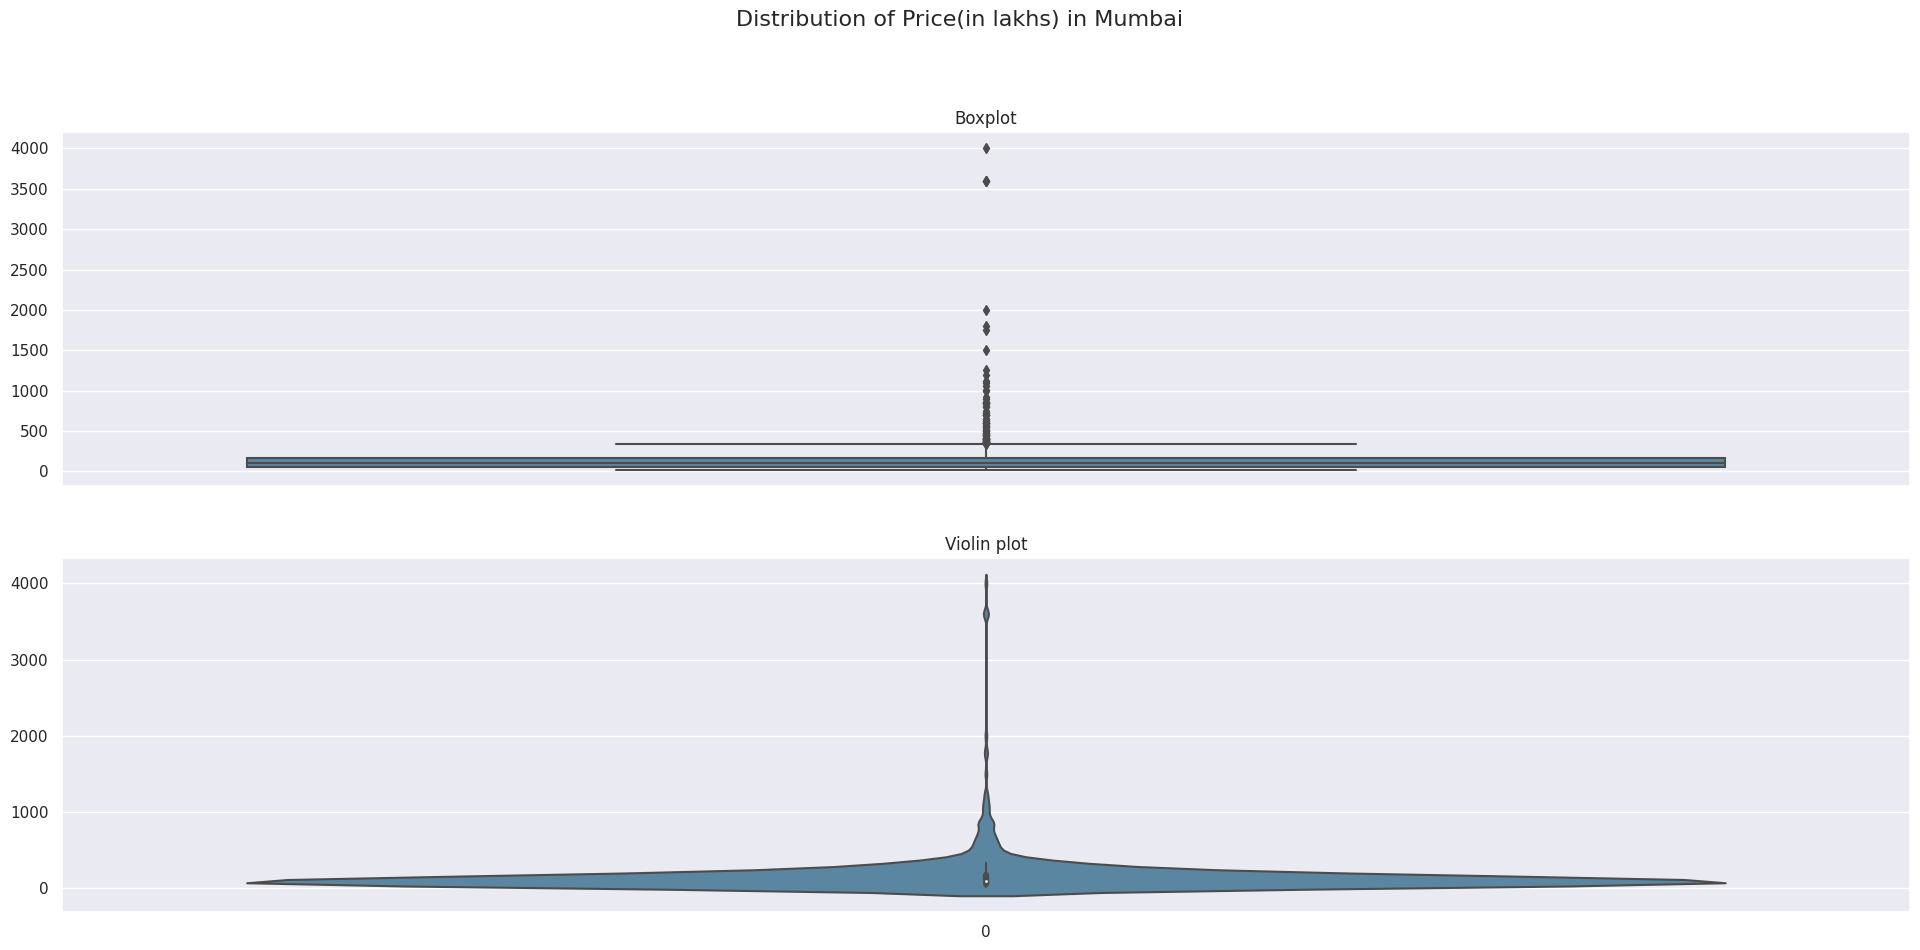

In [35]:
triple_plot(df1['Price'],'Distribution of Price(in lakhs) in Mumbai',custom_colors[0])

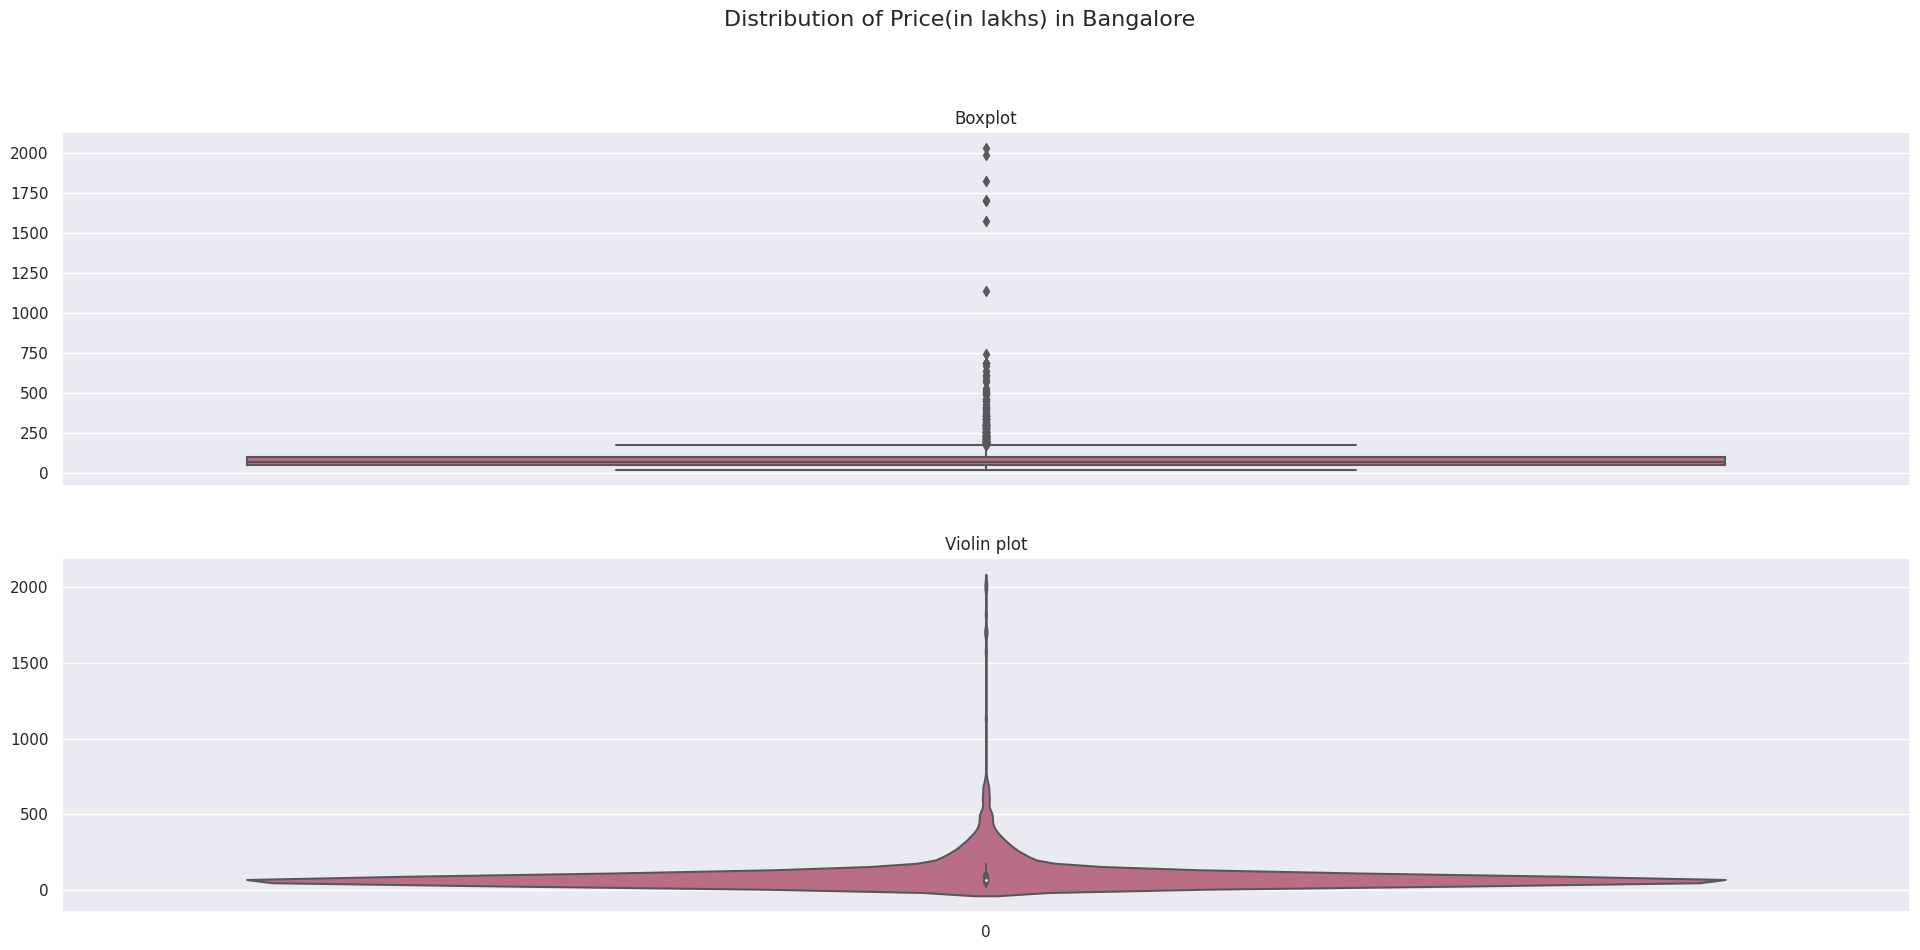

In [36]:
triple_plot(df2['Price'],'Distribution of Price(in lakhs) in Bangalore',custom_colors[1])

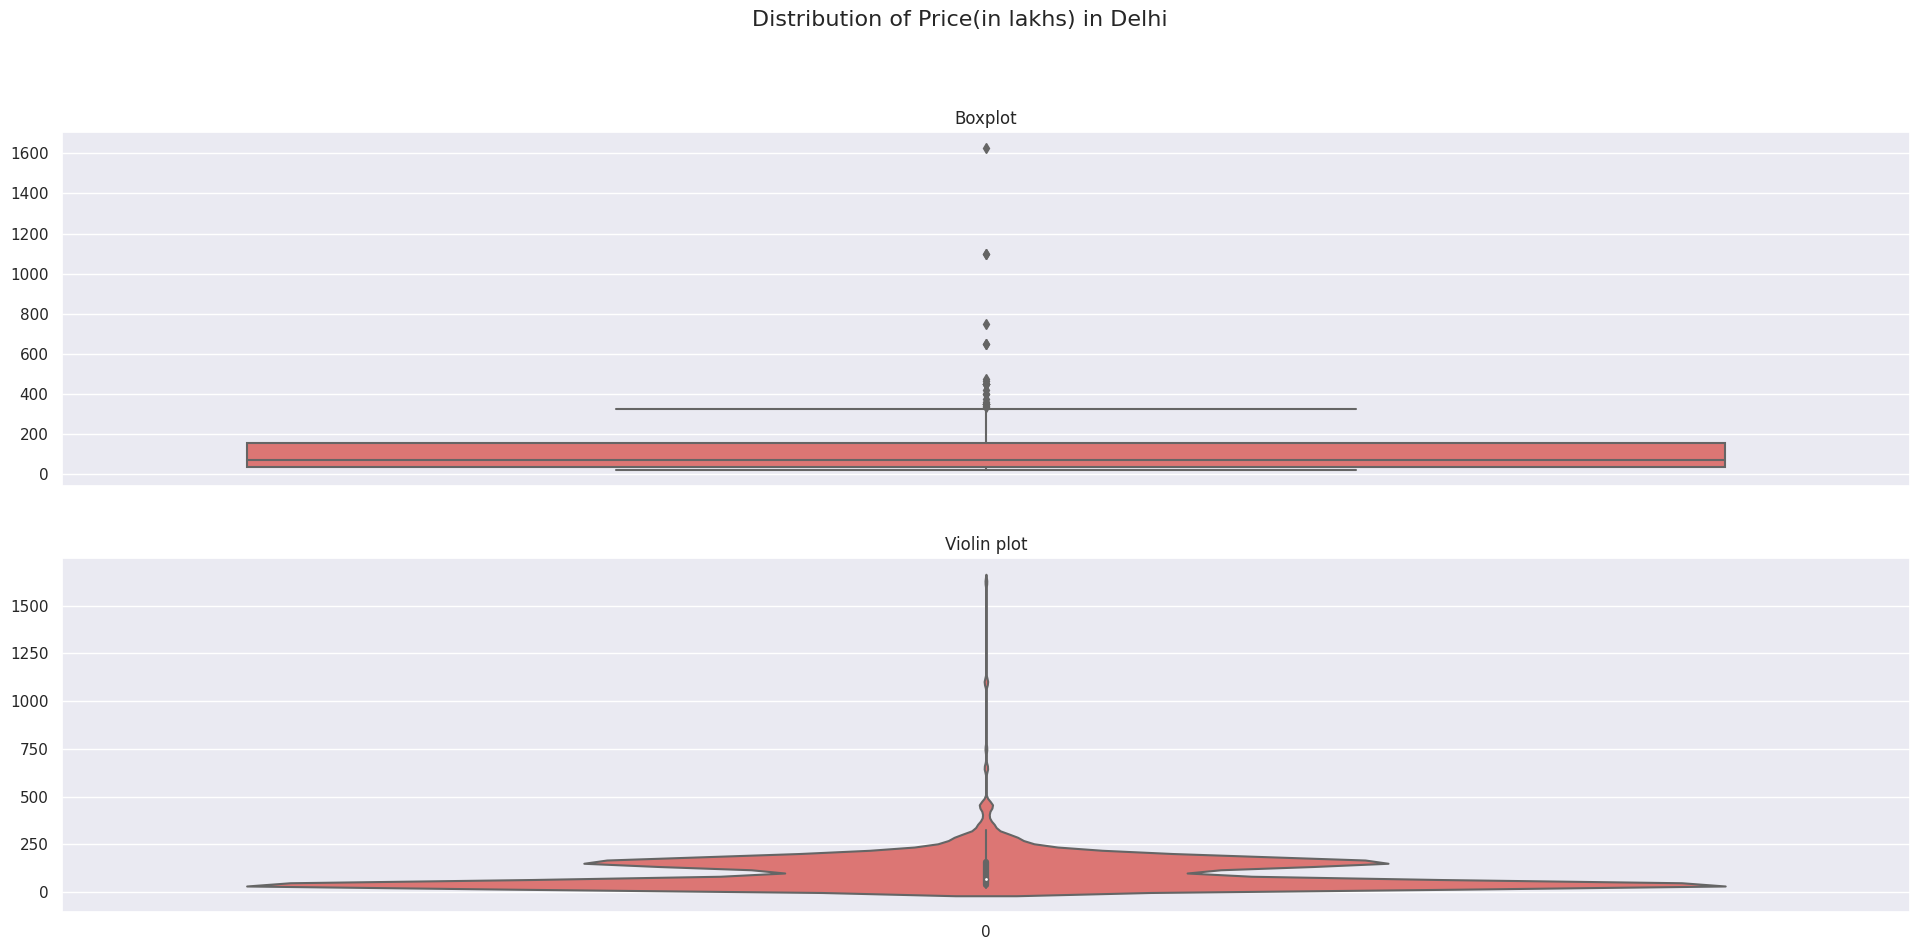

In [37]:
triple_plot(df3['Price'],'Distribution of Price(in lakhs) in Delhi',custom_colors[2])

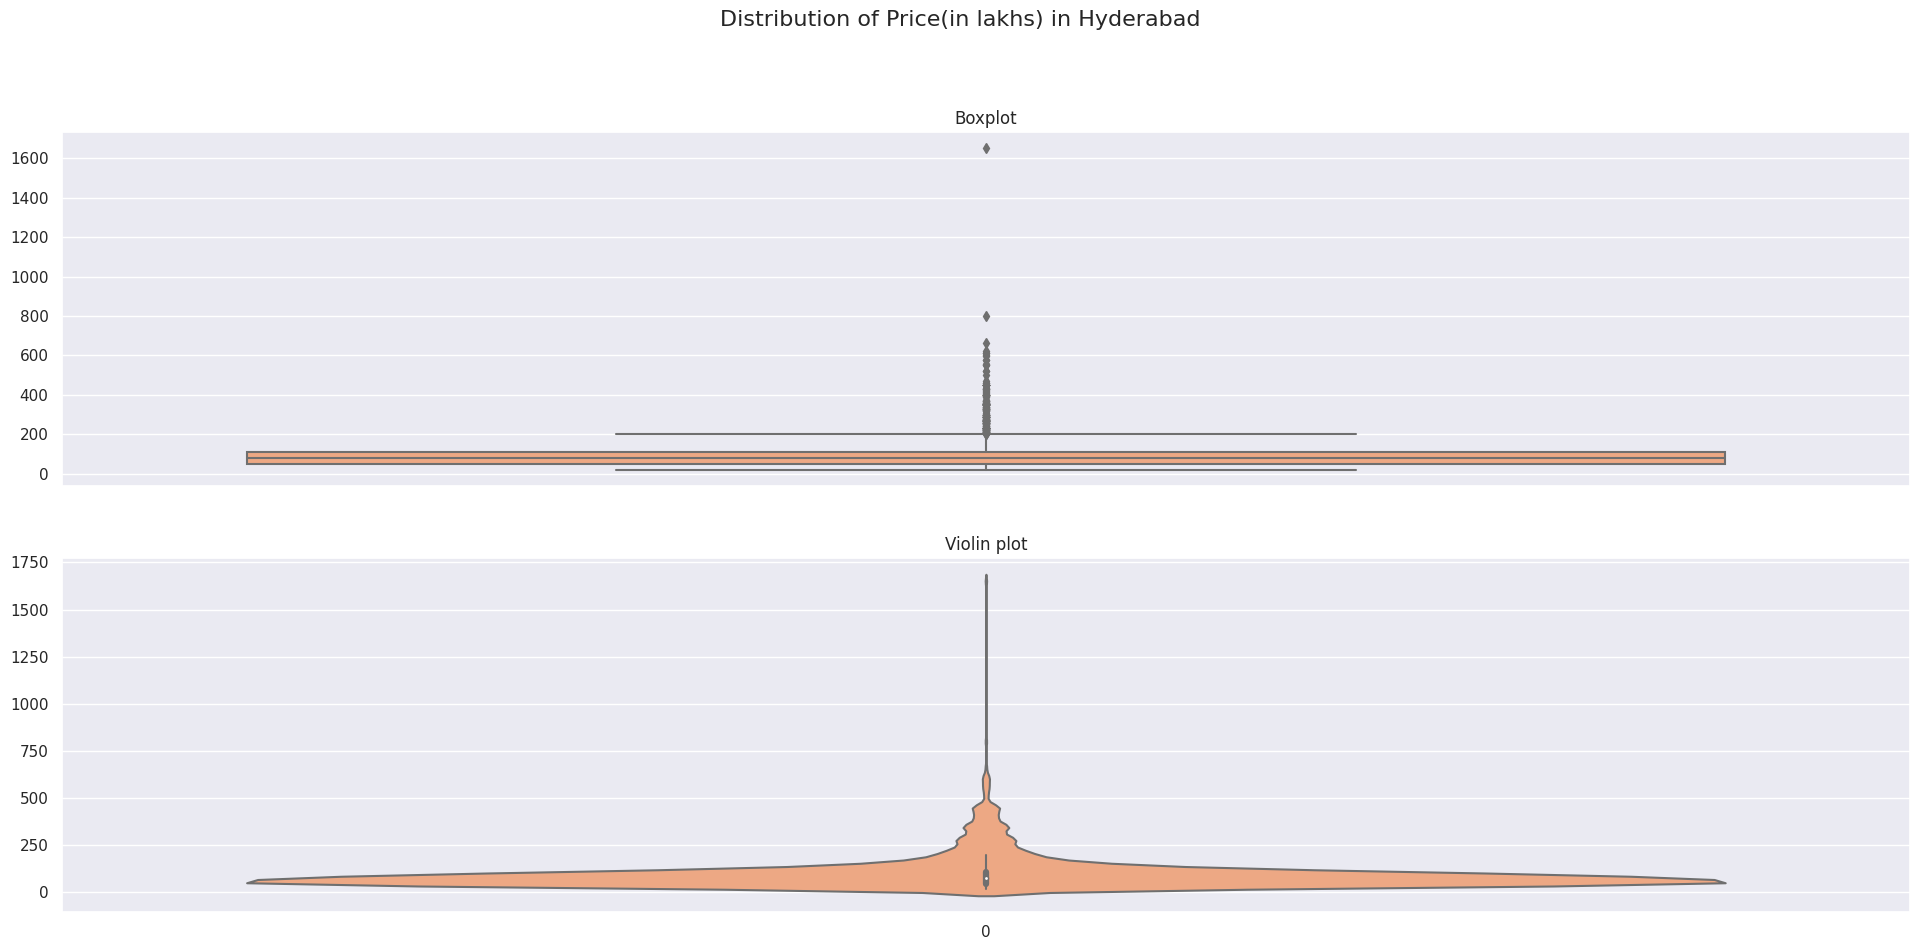

In [38]:
triple_plot(df4['Price'],'Distribution of Price(in lakhs) in Hyderabad',custom_colors[3])

In [39]:
def count_plot(data,title,p):
    df5=data[data['Resale']== 0] #new properties
    df6=data[data['Resale']== 1] # resale properties
    fig, ax = plt.subplots(1,2,figsize=(15, 10)) #1 rows and 2 columns ie. two plots side by side
    # ax[0] and ax[1] ax is the variable followed by a tuple are the two subplots having new and resale properties
    ax[0]=sns.countplot(y='Location', data=df5, order=df5.Location.value_counts().index[:10],ax=ax[0],palette = p) # top 10 location in desc
    ax[0].set_title('Number of New Properties')
    ax[1]=sns.countplot(y='Location', data=df6, order=df6.Location.value_counts().index[:10],ax=ax[1],palette = p)
    ax[1].set_title('Number of Resale Properties')   
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

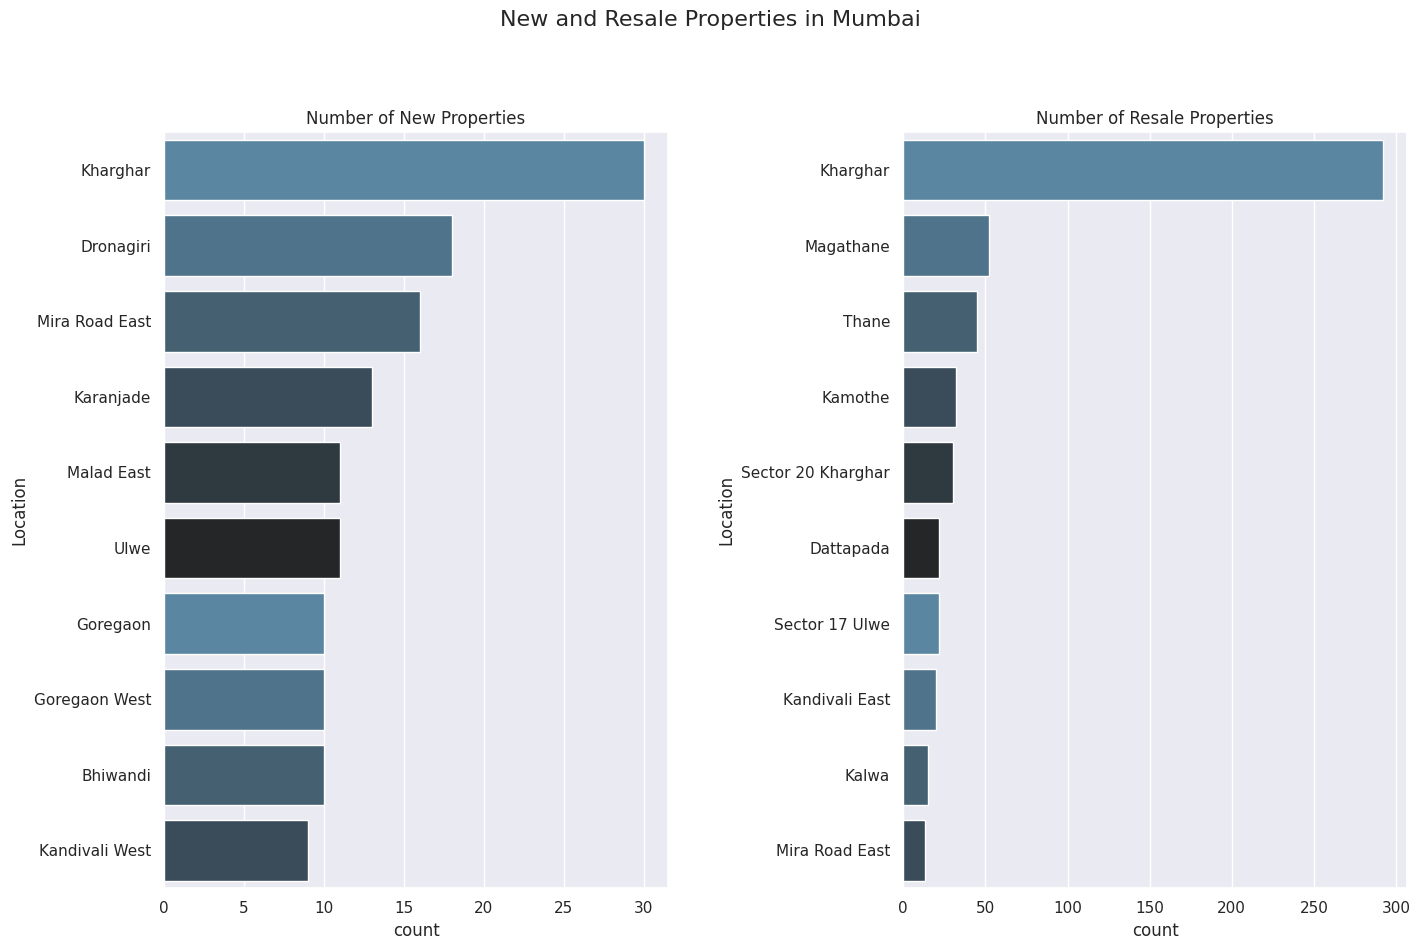

In [40]:
count_plot(df1,'New and Resale Properties in Mumbai',mumbai)

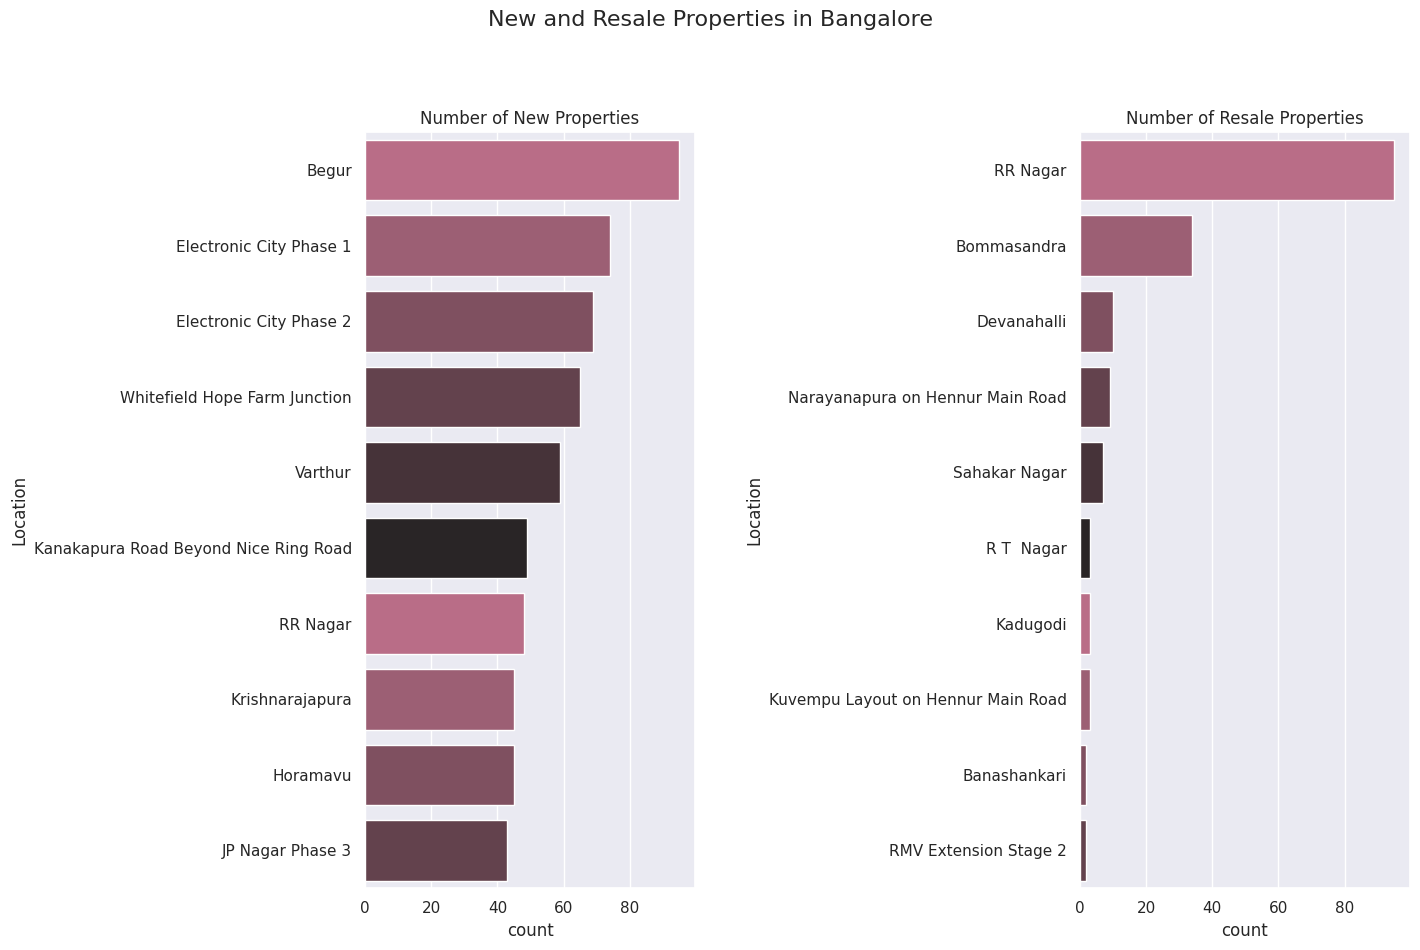

In [41]:
count_plot(df2,'New and Resale Properties in Bangalore',bangalore)

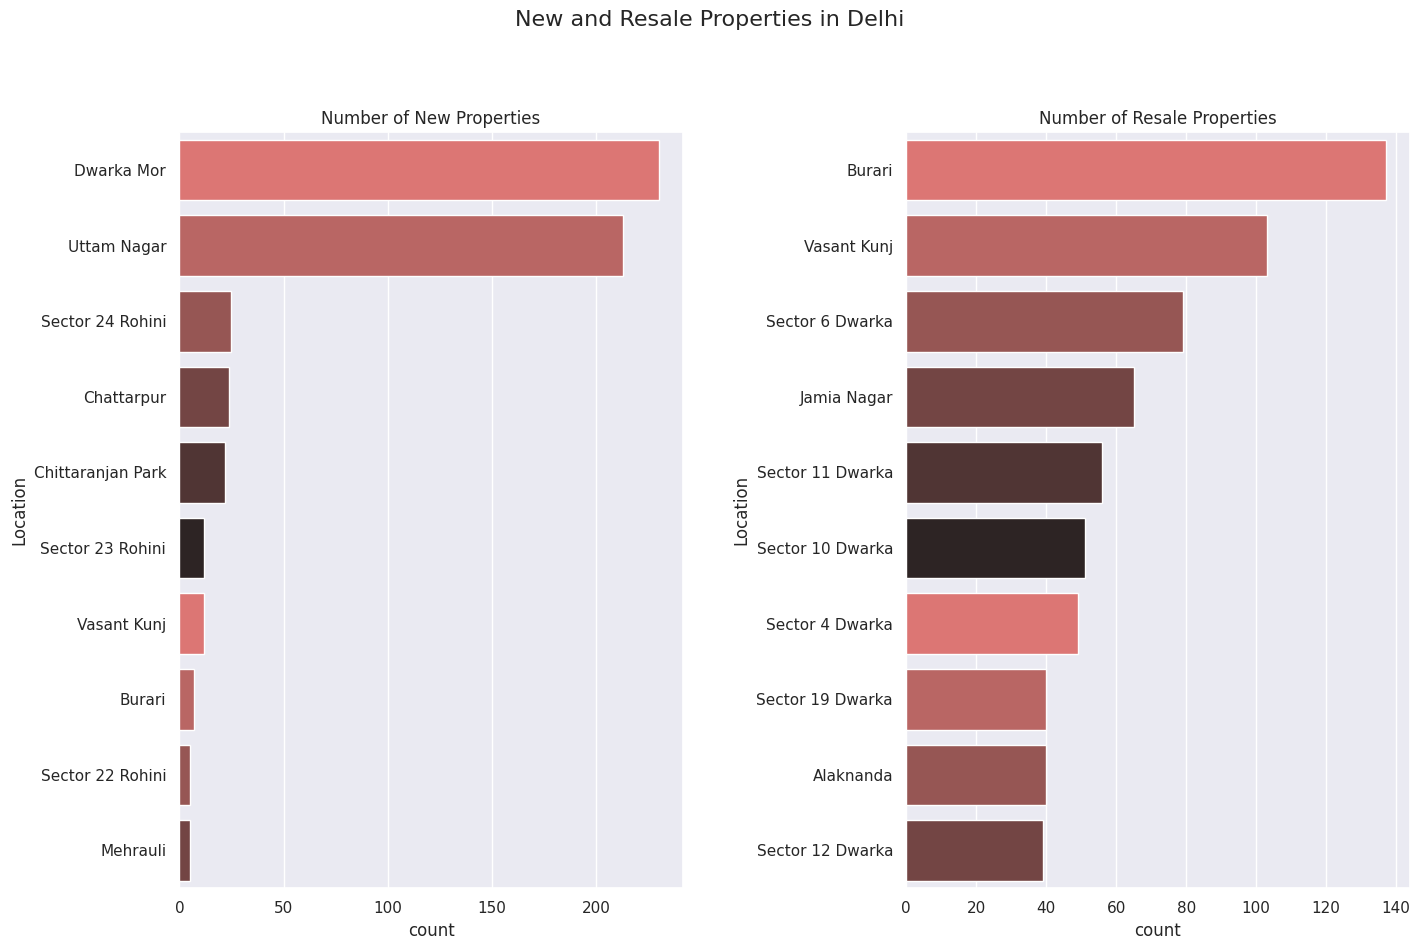

In [42]:
count_plot(df3,'New and Resale Properties in Delhi',delhi)

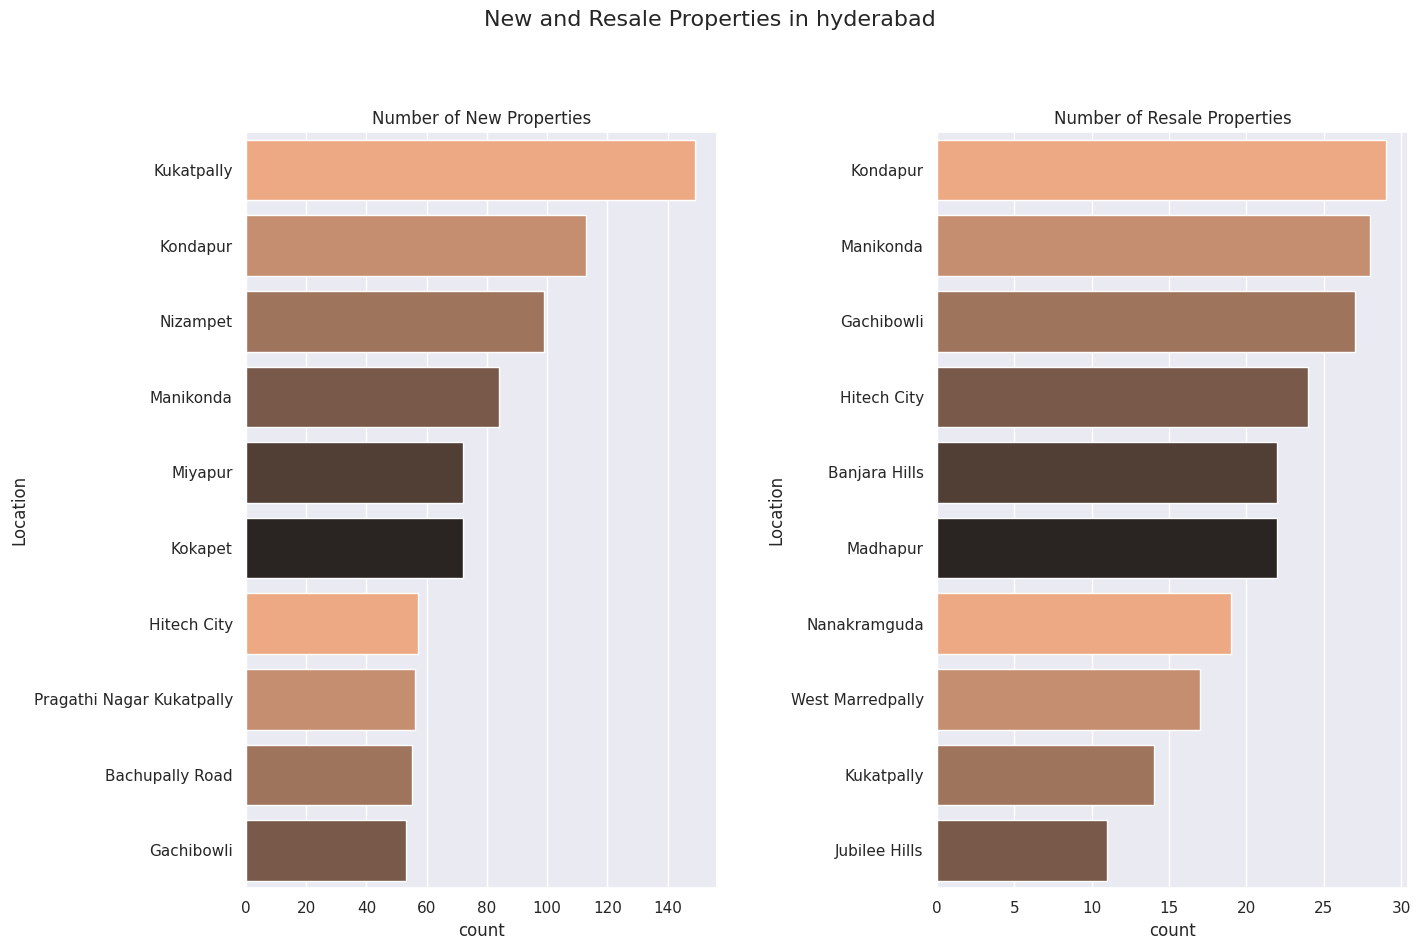

In [43]:
count_plot(df4,'New and Resale Properties in hyderabad',hyderabad)

In [44]:
def cat_plot(data,title,p):
    sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
    plt.title('No. of Bedrooms vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

In [45]:
# cat_plot(df1,'Mumbai',mumbai)

In [46]:
# cat_plot(df2,'Bangalore',bangalore)

In [47]:
# cat_plot(df3,'Delhi',delhi)

In [48]:
# cat_plot(df4,'Hyderabad',hyderabad)

In [49]:
def scatter_plot(data,title,c):
    sns.scatterplot(x='Area',y ='Price', data=data, color=c, marker='P')
    plt.title("Area in sq.ft Vs Price in " + title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()


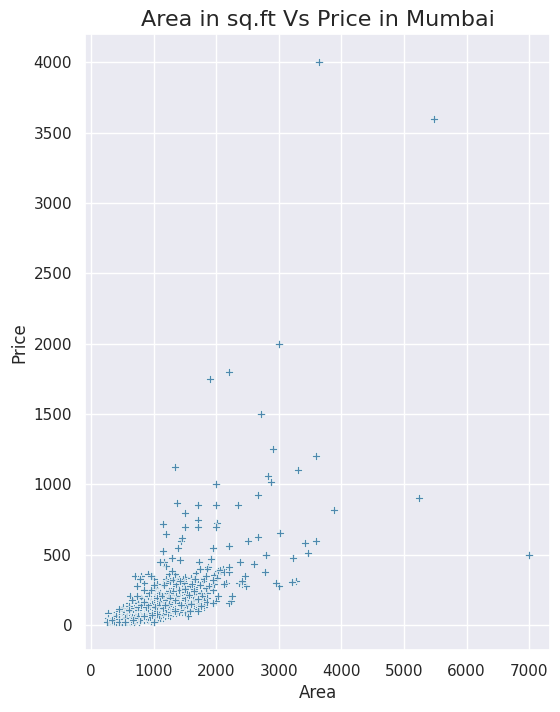

In [50]:
scatter_plot(df1,'Mumbai',custom_colors[0])

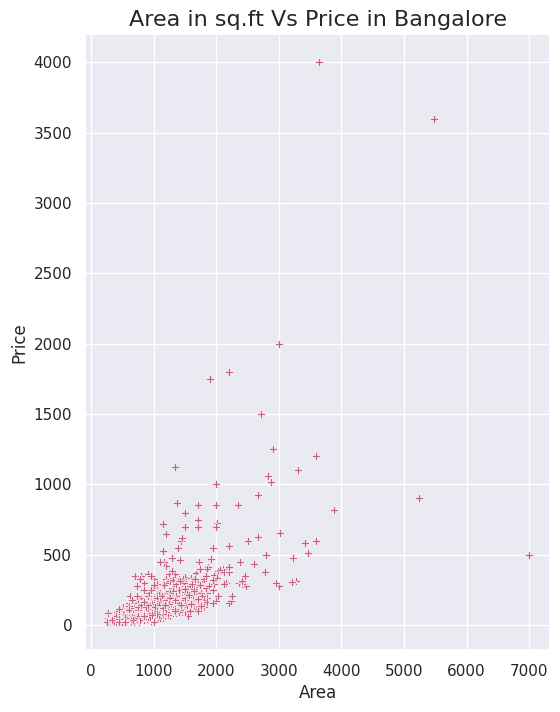

In [51]:
scatter_plot(df1,'Bangalore',custom_colors[1])

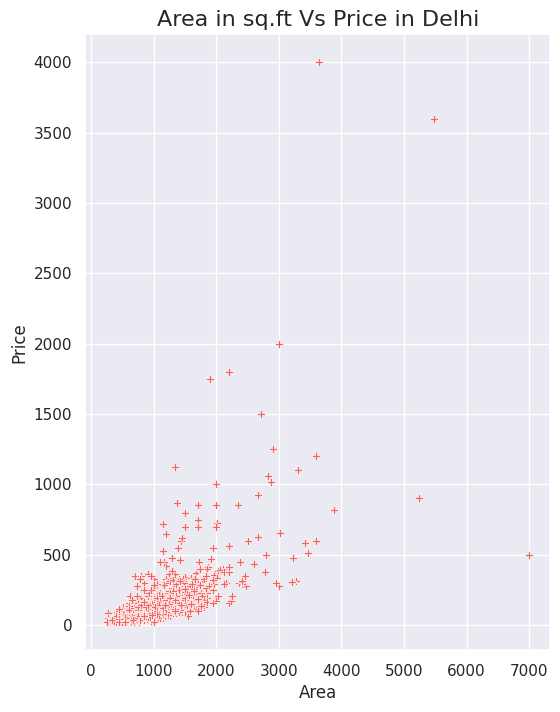

In [52]:
scatter_plot(df1,'Delhi',custom_colors[2])

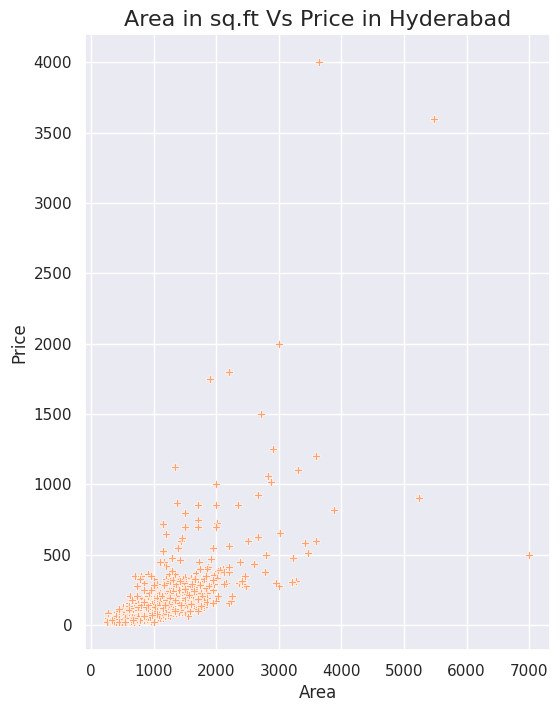

In [53]:
scatter_plot(df1,'Hyderabad',custom_colors[3])

In [54]:
c1 = ["#4e89ae","#BFD5E2"]
c2 = ["#c56183","#E6BCCA"]
c3 = ["#ed6663","#F7BDBC"]
c4 = ["#ffa372","#FFDECC"]

In [55]:
# def pie_chart(df,link,c, addAll=True)
# df = df.iloc[]

In [56]:
frames = [df1,df2,df3,df4]
merged = pd.concat(frames)
merged = merged.loc[:, ~merged.columns.str.contains('^Unnamed')]

In [57]:
# Correlations

merged.columns
merged = merged.rename(columns={"Children'splayarea": "ChildrenPlayArea"})
merged = merged.dropna()

In [58]:

# encoded_df = pd.get_dummies(merged)
# plt.figure(figsize=(30,35))
# corr=merged.corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))
# sns.heatmap(merged.corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
#             square=True, linewidths=.5,annot=True)
# plt.show()


In [59]:
import eli5
from eli5.sklearn import PermutationImportance

feature_names = ['Area','No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'ChildrenPlayArea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']

X = merged[feature_names]
y = merged['Price']

2024-03-04 13:57:37.332386: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 13:57:37.332541: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 13:57:37.502072: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [60]:
print(merged.columns)

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'ChildrenPlayArea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')


In [61]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)
model = RandomForestRegressor().fit(train_X, train_y)


In [62]:
perm = PermutationImportance(model, random_state=1).fit(test_X, test_y)
eli5.show_weights(perm, feature_names = test_X.columns.tolist())

Weight,Feature
1.1824 ± 0.1130,Area
0.0724 ± 0.0174,Resale
0.0298 ± 0.0123,LandscapedGardens
0.0281 ± 0.0088,No. of Bedrooms
0.0260 ± 0.0164,VaastuCompliant
0.0221 ± 0.0082,IndoorGames
0.0192 ± 0.0105,Intercom
0.0189 ± 0.0064,ChildrenPlayArea
0.0144 ± 0.0033,StaffQuarter
0.0132 ± 0.0047,RainWaterHarvesting


In [63]:
model2 = DecisionTreeRegressor(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

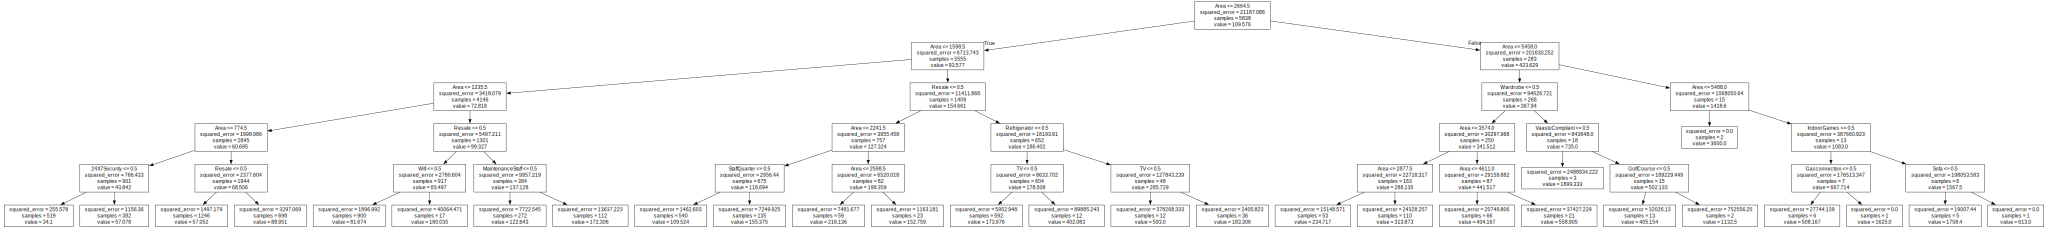

In [64]:
import graphviz
from sklearn import tree

tree_graph = tree.export_graphviz(model2, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph) #the leaves indicate splitting criteria, the branches represent true or false 

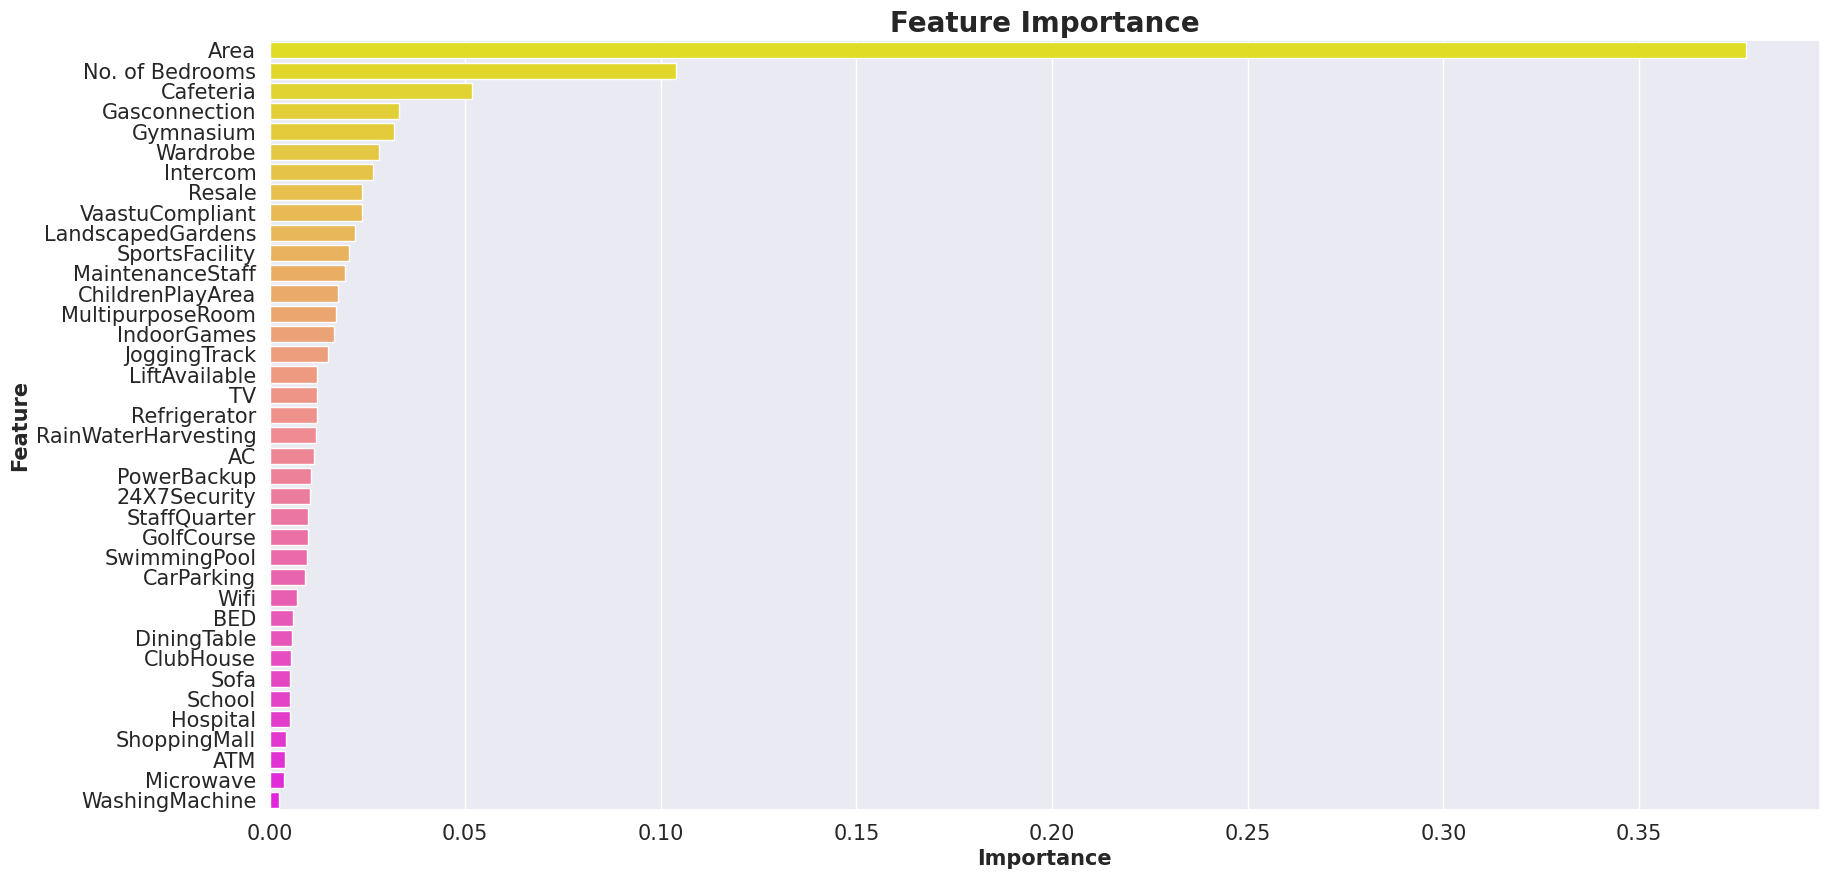

In [65]:
model3= ExtraTreesRegressor()
model3.fit(train_X,train_y)
fi = pd.DataFrame(model3.feature_importances_,columns=['importance'])
fi['feature'] = feature_names
fi = fi.sort_values('importance', ascending=False)

plt.figure(figsize=(20,10))
ax = sns.barplot(data=fi, x='importance', y='feature',palette="spring_r")
ax.tick_params(axis='both',which ='both',labelsize=15);
ax.set_xlabel('Importance', fontsize=15, weight='bold');
ax.set_ylabel('Feature', fontsize=15, weight='bold');
plt.title('Feature Importance', size=20, weight='bold');


In [66]:
lr = LinearRegression()

In [67]:
lr.fit(train_X,train_y)

LinearRegression()

In [68]:
y_pred = lr.predict(test_X)

In [69]:
print("Mean Absolute Error",mean_absolute_error(test_y,y_pred))
print("Mean Squared Error",mean_squared_error(test_y,y_pred))
print("R2 Score", r2_score(test_y, y_pred))

Mean Absolute Error 41.52365858743187
Mean Squared Error 9810.316735045033
R2 Score 0.48879587185054174


In [70]:
def train_model(m,name):
    model = m
    model.fit(X=train_X, y=train_y)
    predictions = model.predict(test_X)
    MeanAbsoluteError = mean_absolute_error(test_y, predictions)
    R2Score = r2_score(test_y, predictions)
    MeanSquaredError = mean_squared_error(test_y, predictions)
    print("{0} MeanAbsoluteError {1} R2Score {2} MeanSquaredError {3}".format(name,MeanAbsoluteError,R2Score,MeanSquaredError))
    
train_model(DecisionTreeRegressor(),'Decision Tree Regressor')
train_model(RandomForestRegressor(),'Random Forest Regressor')
train_model(XGBRegressor(n_estimators=680),'XGBoost Regressor')
    

Decision Tree Regressor MeanAbsoluteError 30.322516998139324 R2Score 0.2154661822845385 MeanSquaredError 15055.678969189712
Random Forest Regressor MeanAbsoluteError 25.65899891228152 R2Score 0.7237895649683797 MeanSquaredError 5300.64548381845
XGBoost Regressor MeanAbsoluteError 25.68007054761145 R2Score 0.6310449812414827 MeanSquaredError 7080.470199073395
